In [39]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [40]:
df = pd.read_csv("C:\\Users\\Tafzeel\\Downloads\\bronze.csv")
df.head()

,Tin content,Alloy composition,Theoretical density,Solidus temperature,Powder type,Hardness,Particle size,Compaction pressure,Heating rate,Sintering temperature,Holding time,Sintering atmosphere,Green density,Densification parameter
0,0.0,24.8640,9.154,326,1,224.560,30.9,335,5,800,0.33,2.0,6.497705,1
1,0.0,24.8640,9.154,326,1,224.560,30.9,335,5,800,0.67,2.0,6.974476,1
2,0.0,24.8640,9.154,326,1,224.560,30.9,335,5,800,1.00,2.0,7.254545,1
3,1.0,25.6367,9.133,326,1,222.984,30.9,335,5,800,0.33,2.0,6.946334,1
4,1.0,25.6367,9.133,326,1,222.984,30.9,335,5,800,0.67,2.0,6.717047,1


In [41]:
#Get statistics about the data
df.describe()

,Tin content,Alloy composition,Theoretical density,Solidus temperature,Powder type,Hardness,Particle size,Compaction pressure,Heating rate,Sintering temperature,Holding time,Sintering atmosphere,Green density,Densification parameter
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,10.564286,16.935547,8.744122,762.652381,0.576190,230.524705,48.421333,373.176190,5.523810,777.785714,0.953514,10.113524,6.781443,0.642857
std,6.924142,8.952145,0.187680,210.675828,0.550254,27.814397,50.854903,171.816143,2.286198,147.429252,2.538222,13.541097,0.919095,0.480302
min,0.000000,0.000000,8.374000,326.000000,0.000000,190.800000,20.000000,100.000000,5.000000,250.000000,0.000000,0.000000,5.000000,0.000000
25%,8.000000,11.871000,8.690000,755.000000,0.000000,224.560000,30.900000,200.000000,5.000000,775.000000,0.330000,1.250000,6.215867,0.000000
50%,10.000000,14.245200,8.727800,860.000000,1.000000,230.000000,30.900000,335.000000,5.000000,815.000000,0.500000,2.000000,6.840000,1.000000
75%,12.000000,24.864000,8.775000,860.000000,1.000000,230.000000,44.000000,510.000000,5.000000,850.000000,0.670000,26.700000,7.260000,1.000000
max,29.600000,35.138160,9.154000,1085.000000,2.000000,339.500000,250.000000,800.000000,20.000000,970.000000,32.000000,39.940000,8.630000,1.000000


In [42]:
X = df.iloc[:, :-1].values
print(X)

[[ 0.         24.864       9.154      ...  0.33        2.
   6.49770535]
 [ 0.         24.864       9.154      ...  0.67        2.
   6.9744762 ]
 [ 0.         24.864       9.154      ...  1.          2.
   7.254545  ]
 ...
 [12.         14.2452      8.69       ...  0.5         2.
   7.11      ]
 [12.         14.2452      8.69       ...  0.5         2.
   5.18      ]
 [12.         14.2452      8.69       ...  0.5         2.
   7.06      ]]


In [43]:
y = df.iloc[:, -1].values
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1
 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0]


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 10)

In [45]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [46]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Swelling','Shrinkage']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [47]:
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [48]:
total_models = ['LogisticRegression','GridSearchCV','SVC','RandomForestClassifier']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Training Accuracy: 0.8979591836734694
Testing Accuracy: 0.8571428571428571


Confusion Matrix:
[[19  5]
 [ 4 35]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        24
           1       0.88      0.90      0.89        39

    accuracy                           0.86        63
   macro avg       0.85      0.84      0.85        63
weighted avg       0.86      0.86      0.86        63



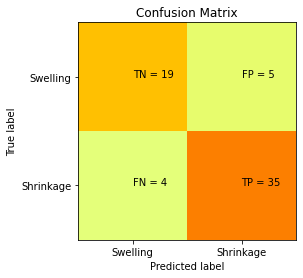

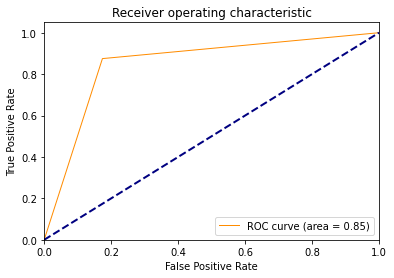


Acuuracy Of the Model:  0.8571428571428571 




In [50]:
# Creating a logistic regression classifier
lr = LogisticRegression()

# Fitting the model on the training data
lr.fit(X_train, y_train)

# Predicting on the training and testing data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Printing the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
report_performance(lr) 
roc_curves(lr)
accuracy(lr)

Training Accuracy: 0.891156462585034
Testing Accuracy: 0.8412698412698413


Confusion Matrix:
[[18  6]
 [ 4 35]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.85      0.90      0.88        39

    accuracy                           0.84        63
   macro avg       0.84      0.82      0.83        63
weighted avg       0.84      0.84      0.84        63



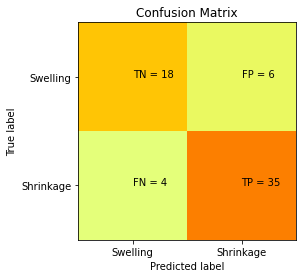

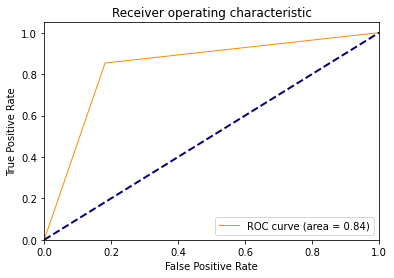


Acuuracy Of the Model:  0.8412698412698413 




In [51]:
# Creating a support vector machine classifier
svm = SVC(kernel="linear", C= 0.2,random_state= 20)

# Fitting the svm model on the training data
svm.fit(X_train, y_train)

# Predicting on the training and testing data
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Printing the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

report_performance(svm) 
roc_curves(svm)
accuracy(svm)

Training Accuracy: 0.9387755102040817
Testing Accuracy: 0.9206349206349206
Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}


Confusion Matrix:
[[21  3]
 [ 2 37]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        24
           1       0.93      0.95      0.94        39

    accuracy                           0.92        63
   macro avg       0.92      0.91      0.92        63
weighted avg       0.92      0.92      0.92        63



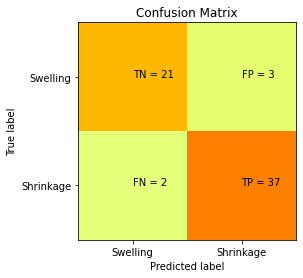

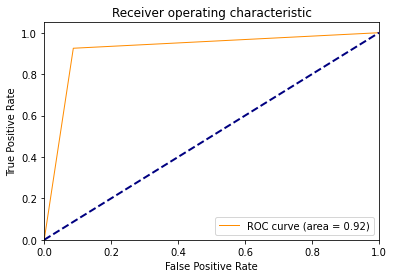


Acuuracy Of the Model:  0.9206349206349206 




In [52]:
# Creating a random forest classifier
rfc=RandomForestClassifier(random_state= 10)

param_grid = { 
    'n_estimators': [200],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring = 'roc_auc')


# Fitting the rfc model on the training data
CV_rfc.fit(X_train, y_train)

# Predicting on the training and testing data
y_train_pred = CV_rfc.predict(X_train)
y_test_pred = CV_rfc.predict(X_test)

# Printing the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc) 
roc_curves(CV_rfc)
accuracy(CV_rfc)